توضيح كدها در يك فايل ضميمه شده است.

### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [2]:
filepath='F:/DataScience-Sharif/FinalProject/proyecto/'

In [3]:
filenames = list()

filenames = ['D_dribble1.txt', 'D_dribble2.txt', 'D_dribble3.txt',
                  'Jc_dribble1.txt','Jc_dribble2.txt','Jc_dribble3.txt',
                 'L_dribble1.txt', 'L_dribble2.txt', 'L_dribble3.txt',
                 'X_dribble1.txt', 'X_dribble2.txt', 'X_dribble3.txt',
                  'D_hold1.txt', 'D_hold2.txt', 'D_hold3.txt',
                  'Jc_hold1.txt','Jc_hold2.txt','Jc_hold3.txt',
                 'L_hold1.txt', 'L_hold2.txt', 'L_hold3.txt',
                 'X_hold1.txt', 'X_hold2.txt', 'X_hold3.txt',
                  'D_pass1.txt', 'D_pass2.txt', 'D_pass3.txt','D_pass4.txt','D_pass5.txt','D_pass6.txt',
                  'Jc_pass1.txt','Jc_pass2.txt','Jc_pass3.txt','Jc_pass4.txt','Jc_pass5.txt',
                 'L_pass1.txt', 'L_pass2.txt', 'L_pass3.txt','L_pass4.txt','L_pass5.txt',
                 'X_pass1.txt', 'X_pass2.txt', 'X_pass3.txt',
             'D_shoot1.txt', 'D_shoot2.txt', 'D_shoot3.txt','D_shoot4.txt','D_shoot5.txt',
                  'Jc_shoot1.txt','Jc_shoot2.txt','Jc_shoot3.txt','Jc_shoot4.txt','Jc_shoot5.txt',
                 'L_shoot1.txt', 'L_shoot2.txt', 'L_shoot3.txt','L_shoot4.txt','L_shoot5.txt',
                 'X_shoot1.txt', 'X_shoot2.txt', 'X_shoot3.txt',
             'D_pickup1.txt', 'D_pickup2.txt', 'D_pickup3.txt','D_pickup4.txt','D_pickup5.txt',
                  'Jc_pickup1.txt','Jc_pickup2.txt','Jc_pickup3.txt','Jc_pickup4.txt','Jc_pickup5.txt',
                 'L_pickup1.txt', 'L_pickup2.txt', 'L_pickup3.txt','L_pickup4.txt','L_pickup5.txt',
                 'X_pickup1.txt', 'X_pickup2.txt', 'X_pickup3.txt']

In [6]:
def read_files(filenames):
    chunks=[]

    dff = pd.DataFrame()
    for name in filenames:
        data = pd.read_csv(filepath+name, header=None)
   
        if name.find('pass') != -1:
            data[-1]='Pass'
        elif name.find('dribble') != -1:
            data[-1]='Dribble'
        elif name.find('hold') != -1:
            data[-1]='Hold'
        elif name.find('shoot') != -1:
            data[-1]='Shoot'
        elif name.find('pickup') != -1:
            data[-1]='Pickup'
        
        chunks.append(data)
    

    dff = pd.concat(chunks, ignore_index=True)
    dff.columns = ['Time', 'X', 'Y', 'Z' , 'R','Theta' , 'Phi','Action']
    return dff
    

In [11]:
dff=read_files(filenames)
dff


,Time,X,Y,Z,R,Theta,Phi,Action
0,0.000000,3.428497,9.112331,-2.047042,9.948847,101.873802,69.381287,Dribble
1,0.009703,3.447650,9.285912,-2.331953,10.176072,103.247643,69.631172,Dribble
2,0.019734,3.506308,9.212888,-2.244564,10.109875,102.827530,69.163811,Dribble
3,0.029704,3.703830,8.972271,-1.990779,9.908744,101.590256,67.568748,Dribble
4,0.039805,3.902549,8.799889,-1.545457,9.749685,99.120628,66.083809,Dribble
...,...,...,...,...,...,...,...,...
52908,5.780185,0.017450,0.997584,0.107751,1.003538,83.836189,88.997864,Pickup
52909,5.789986,0.026846,0.994167,0.112144,1.000832,83.566437,88.453171,Pickup
52910,5.800642,0.034412,0.992093,0.130205,1.001192,82.527542,88.013412,Pickup
52911,5.810363,0.058452,0.961830,0.160468,0.976874,80.545372,86.522331,Pickup


In [12]:
#Remove Time column from dataset
dff.drop('Time',inplace=True, axis=1)

In [13]:
#Save data to a file
dff.to_pickle("csvfile")

In [16]:
#Read data from created file
df = pd.read_pickle("csvfile")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52913 entries, 0 to 52912
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       52913 non-null  float64
 1   Y       52913 non-null  float64
 2   Z       52913 non-null  float64
 3   R       52913 non-null  float64
 4   Theta   52913 non-null  float64
 5   Phi     52913 non-null  float64
 6   Action  52913 non-null  object 
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,52913.0,3.093594,3.836847,-39.195477,0.413311,2.833538,5.006276,38.540661
Y,52913.0,6.730142,3.907723,-15.529989,5.038598,8.027759,9.120711,39.221813
Z,52913.0,1.248278,2.778803,-33.500866,0.059855,0.902614,2.037466,28.358122
R,52913.0,8.673607,4.347982,0.074412,8.841101,9.832091,10.023930,54.321270
Theta,52913.0,80.186137,16.058382,9.837831,74.423012,81.003227,88.856789,170.416168
Phi,52913.0,74.838352,44.532418,0.005464,58.346432,69.502472,79.749794,359.945709


<AxesSubplot:xlabel='Action'>

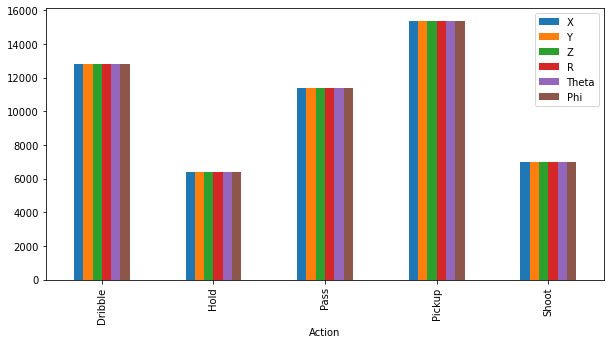

In [19]:
df.groupby("Action").count().plot(kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='Action'>

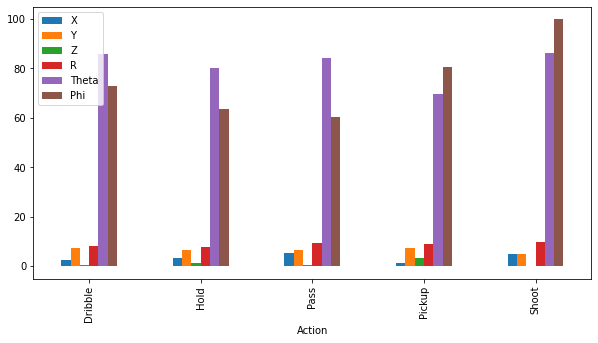

In [20]:
df.groupby("Action").mean().plot(kind='bar',figsize=(10,5))

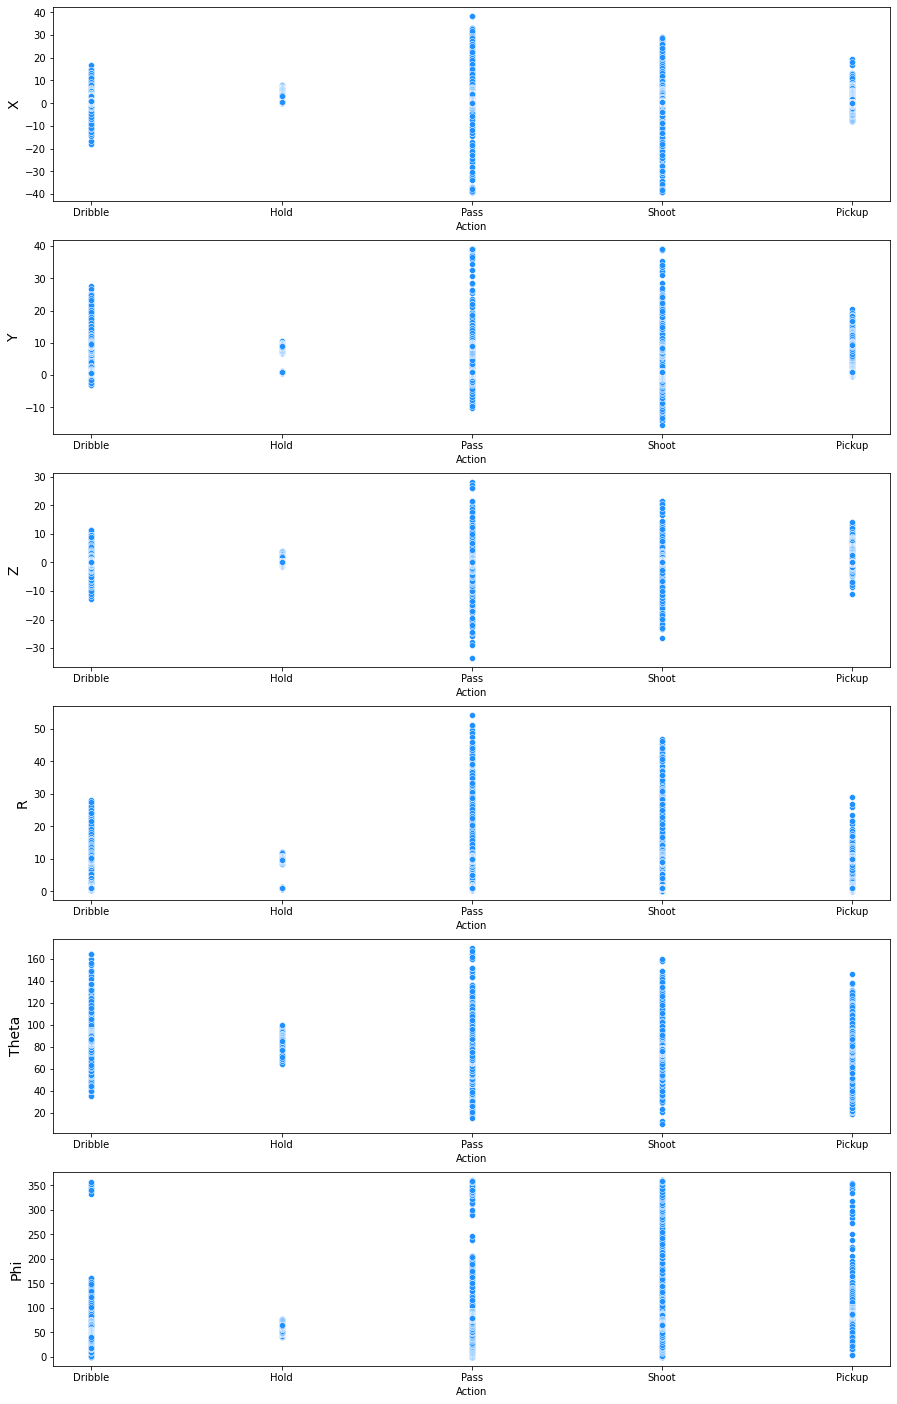

In [21]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))

sns.scatterplot(data=df,x=df['Action'], y=df['X'], ax=ax[0], color='dodgerblue')
ax[0].set_ylabel(ylabel='X', fontsize=14)


sns.scatterplot(x=df['Action'], y=df['Y'], ax=ax[1], color='dodgerblue')
ax[1].set_ylabel(ylabel='Y', fontsize=14)


sns.scatterplot(x=df['Action'], y=df['Z'], ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='Z', fontsize=14)


sns.scatterplot(x=df['Action'], y=df['R'], ax=ax[3], color='dodgerblue')
ax[3].set_ylabel(ylabel='R', fontsize=14)


sns.scatterplot(x=df['Action'], y=df['Theta'], ax=ax[4], color='dodgerblue')
ax[4].set_ylabel(ylabel='Theta', fontsize=14)

sns.scatterplot(x=df['Action'], y=df['Phi'], ax=ax[5], color='dodgerblue')
ax[5].set_ylabel(ylabel='Phi', fontsize=14)

plt.show()


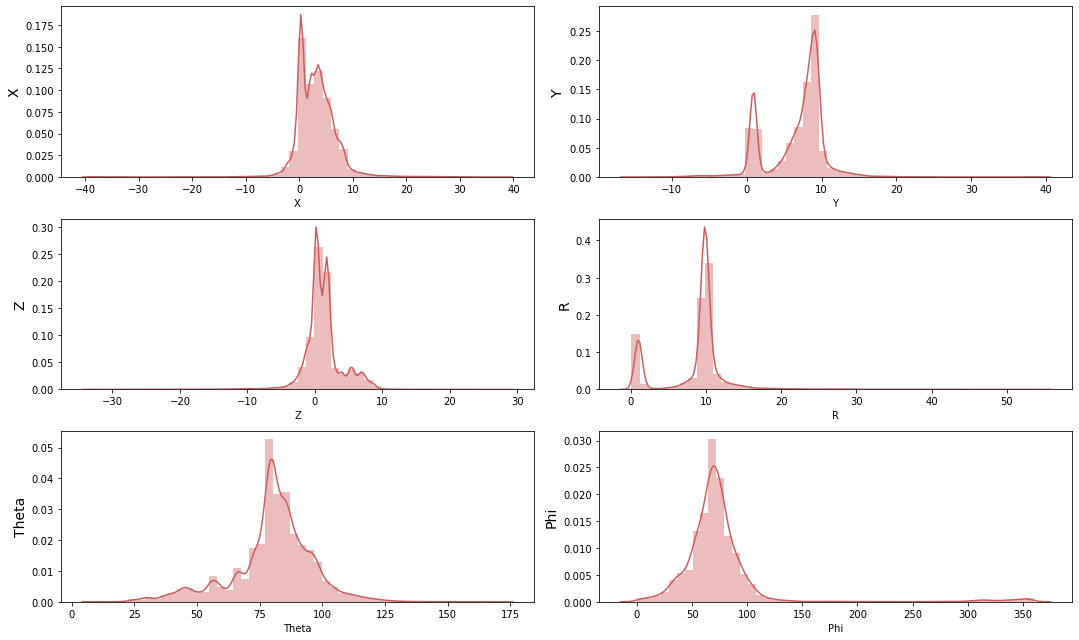

In [22]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

sns.distplot(df['X'], ax=ax[0, 0], color='indianred')
ax[0, 0].set_ylabel(ylabel='X', fontsize=14)

sns.distplot(df['Y'], ax=ax[0, 1], color='indianred')
ax[0, 1].set_ylabel(ylabel='Y', fontsize=14)

sns.distplot(df['Z'], ax=ax[1, 0], color='indianred')
ax[1, 0].set_ylabel(ylabel='Z', fontsize=14)

sns.distplot(df['R'], ax=ax[1, 1], color='indianred')
ax[1, 1].set_ylabel(ylabel='R', fontsize=14)

sns.distplot(df['Theta'], ax=ax[2, 0], color='indianred')
ax[2, 0].set_ylabel(ylabel='Theta', fontsize=14)

sns.distplot(df['Phi'], ax=ax[2, 1], color='indianred')
ax[2, 1].set_ylabel(ylabel='Phi', fontsize=14)

plt.tight_layout()
plt.show()

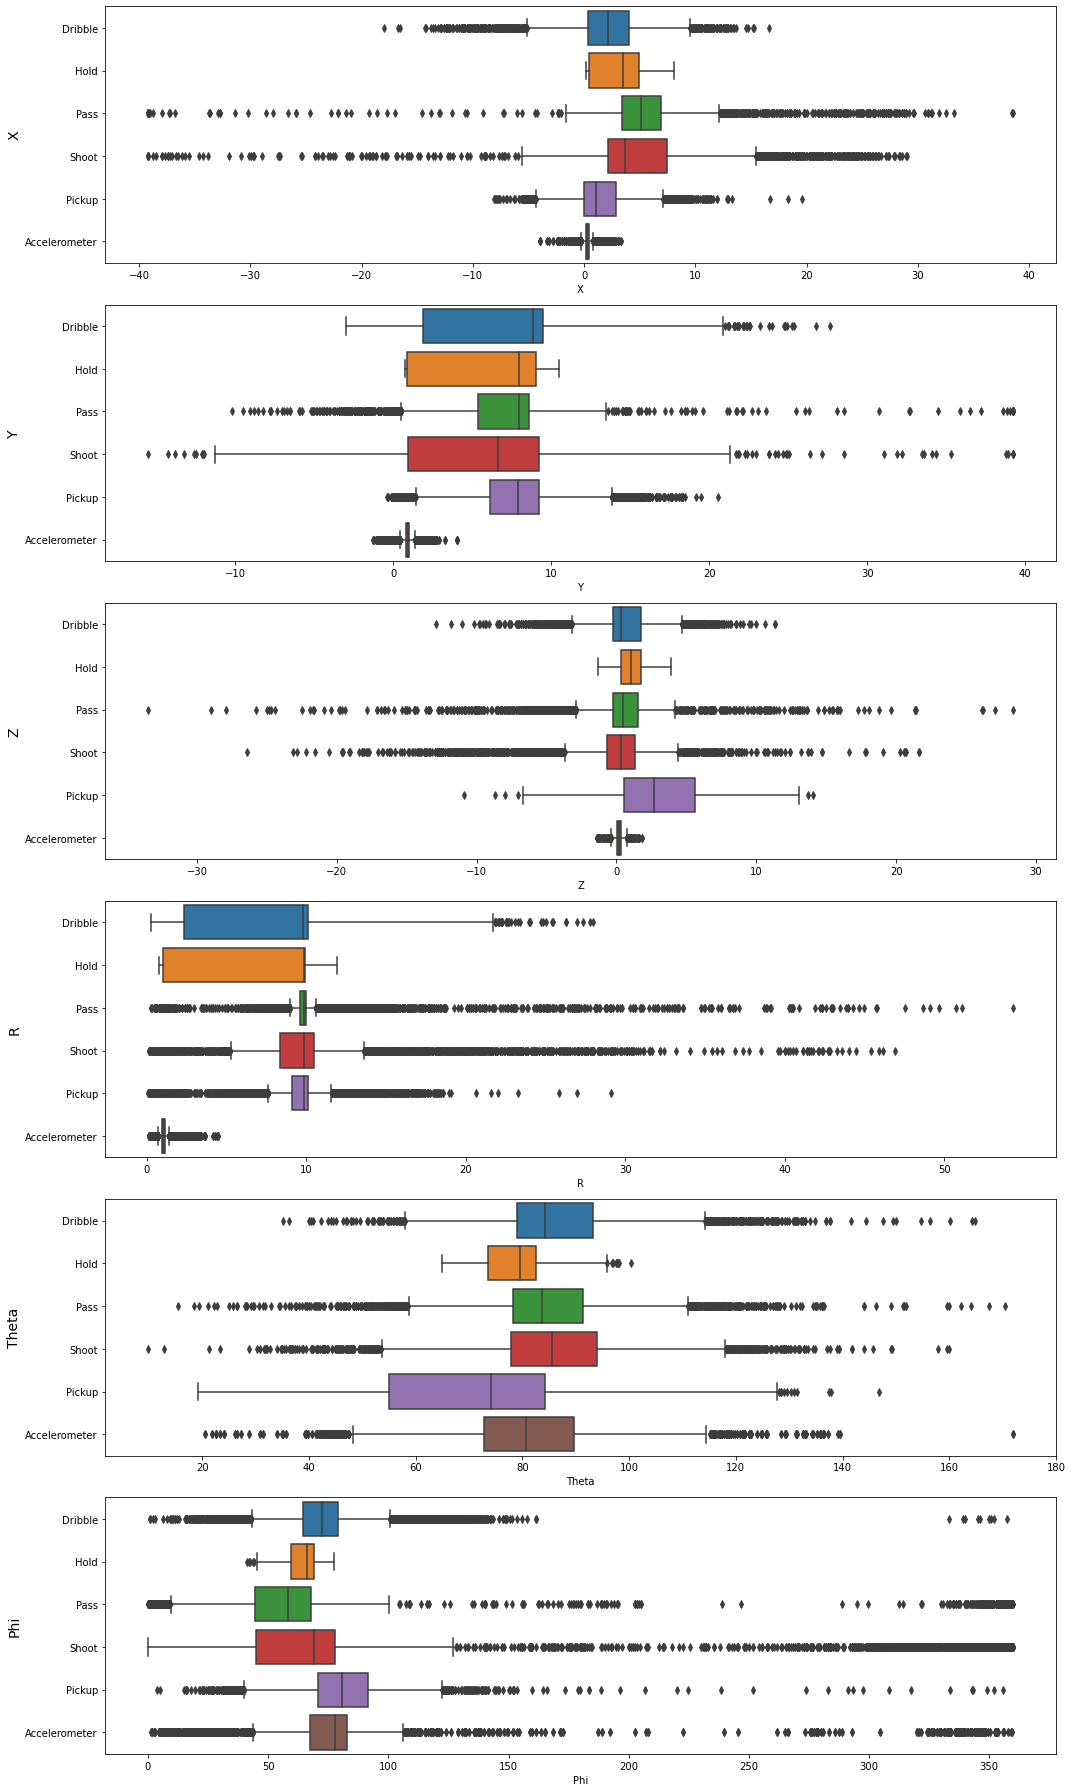

In [ ]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))

sns.boxplot(y=dff['Action'], x=dff['X'], ax=ax[0])
ax[0].set_ylabel(ylabel='X', fontsize=14)


sns.boxplot(y=dff['Action'], x=dff['Y'], ax=ax[1])
ax[1].set_ylabel(ylabel='Y', fontsize=14)

sns.boxplot(y=dff['Action'], x=dff['Z'], ax=ax[2])
ax[2].set_ylabel(ylabel='Z', fontsize=14)

sns.boxplot(y=dff['Action'], x=dff['R'], ax=ax[3])
ax[3].set_ylabel(ylabel='R', fontsize=14)

sns.boxplot(y=dff['Action'], x=dff['Theta'], ax=ax[4])
ax[4].set_ylabel(ylabel='Theta', fontsize=14)

sns.boxplot(y=dff['Action'], x=dff['Phi'], ax=ax[5])
ax[5].set_ylabel(ylabel='Phi', fontsize=14)

plt.tight_layout()
plt.show()

In [23]:
y=df['Action']
df.drop('Action', axis=1,inplace=True)

### Scaling numerical columns

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in df:
   df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))


### Encoding target column

In [25]:
## encode class values as integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encode=le.fit_transform(y)
pd.unique(y_encode)

array([0, 1, 2, 4, 3])

### Split data to train and test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y_encode, test_size=0.3,random_state=42)

In [27]:
x_train.shape

(37039, 6)

In [28]:
y_train.shape

(37039,)

### Modelling

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### 1-KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
param_grid_knn=[{'n_neighbors':list(range(1, 30))}]

In [ ]:
# instantiate the grid
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='accuracy')
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
 print("Accuracy score (training): {0:.3f}".format(grid_knn.score(x_train, y_train)))
 print("Accuracy score (test): {0:.3f}".format(grid_knn.score(x_test, y_test)))


Accuracy score (training): 0.898
Accuracy score (test): 0.829


In [ ]:
predictions = grid_knn.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[1045   16   83  106   63]
 [  25  667   15    0    2]
 [  66   26  600   12   33]
 [  85    7   27 1036    7]
 [  90   15   50   18  265]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1313
           1       0.91      0.94      0.93       709
           2       0.77      0.81      0.79       737
           3       0.88      0.89      0.89      1162
           4       0.72      0.61      0.66       438

    accuracy                           0.83      4359
   macro avg       0.82      0.81      0.81      4359
weighted avg       0.83      0.83      0.83      4359



### 2-SVM Model

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
#Create hyperparameters space
param_grid_svm = [{
'kernel': ['linear','rbf'],
'C':  [1, 10, 100],
'gamma': [0.001,0.01],
'degree': [1, 2, 3, 4]}]

In [ ]:
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=10)
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'degree': [1, 2, 3, 4],
                          'gamma': [0.001, 0.01],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_svm.best_params_))

Best parameters: {'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
 print("Accuracy score (training): {0:.3f}".format(grid_svm.score(x_train, y_train)))
 print("Accuracy score (test): {0:.3f}".format(grid_svm.score(x_test, y_test)))


Accuracy score (training): 0.645
Accuracy score (test): 0.633


In [ ]:
predictions = grid_svm.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[932  88 131 153   9]
 [ 11 547 151   0   0]
 [ 94 202 402   7  32]
 [269  94  25 768   6]
 [173  23 115  15 112]]
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      1313
           1       0.57      0.77      0.66       709
           2       0.49      0.55      0.52       737
           3       0.81      0.66      0.73      1162
           4       0.70      0.26      0.38       438

    accuracy                           0.63      4359
   macro avg       0.64      0.59      0.59      4359
weighted avg       0.65      0.63      0.63      4359



### 3-RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier()

In [ ]:
#Create hyperparameters space
param_grid_forest=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70,80, 90, 100],
                   'max_depth': range(1,10)}]

In [ ]:
# Create grid search
grid_forest = GridSearchCV(estimator=randomf, param_grid=param_grid_forest, scoring='accuracy',cv=10)
grid_forest.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print("Best parameters: {}".format(grid_forest.best_params_))

Best parameters: {'max_depth': 9, 'n_estimators': 90}


In [ ]:
 print("Accuracy score (training): {0:.3f}".format(grid_forest.score(x_train, y_train)))
 print("Accuracy score (test): {0:.3f}".format(grid_forest.score(x_test, y_test)))

Accuracy score (training): 0.859
Accuracy score (test): 0.812


In [ ]:
predictions = grid_forest.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[1121   14   74   84   20]
 [  23  658   27    1    0]
 [ 109   27  552   16   33]
 [ 125   11   13 1008    5]
 [ 138   15   73   13  199]]
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1313
           1       0.91      0.93      0.92       709
           2       0.75      0.75      0.75       737
           3       0.90      0.87      0.88      1162
           4       0.77      0.45      0.57       438

    accuracy                           0.81      4359
   macro avg       0.81      0.77      0.78      4359
weighted avg       0.81      0.81      0.81      4359



### 4-Gradian Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbr_tuned = GradientBoostingClassifier(random_state=42)

params = {'learning_rate':[0.06, 0.08, 0.1, 0.12, 0.14],
         'max_depth':[1, 3, 5, 7, None],
         'min_samples_split':[2, 3, 4, 5]}


In [ ]:
gs_cv = RandomizedSearchCV(gbr_tuned, params)
gs_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [ ]:
gs_cv.best_params_

{'learning_rate': 0.06, 'max_depth': 7, 'min_samples_split': 4}

In [ ]:
 print("Accuracy score (training): {0:.3f}".format(gs_cv.score(x_train, y_train)))
 print("Accuracy score (test): {0:.3f}".format(gs_cv.score(x_test, y_test)))


Accuracy score (training): 0.955
Accuracy score (test): 0.822


In [ ]:
predictions = gs_cv.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[1092   14   84   86   37]
 [  32  652   21    4    0]
 [  97   26  575    8   31]
 [ 111    4   27 1016    4]
 [ 110    6   56   16  250]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1313
           1       0.93      0.92      0.92       709
           2       0.75      0.78      0.77       737
           3       0.90      0.87      0.89      1162
           4       0.78      0.57      0.66       438

    accuracy                           0.82      4359
   macro avg       0.82      0.80      0.81      4359
weighted avg       0.82      0.82      0.82      4359



In [ ]:
import pickle
filename1 = 'finalized_model_SVM.sav'
pickle.dump(svm, open(filename1, 'wb'))

filename2 = 'finalized_model_GB.sav'
pickle.dump(gbr_tuned, open(filename2, 'wb'))

filename3 = 'finalized_model_Random.sav'
pickle.dump(randomf, open(filename3, 'wb'))



### 5-Deep learning Model

In [ ]:
n_input = x_train.shape[1]
n_class = 5
print('feature num: ', n_input)
print('class num: ', n_class)

feature num:  6
class num:  5


In [ ]:
import keras
from keras.regularizers import l2
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import ReLU
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization

In [ ]:
#http://ethen8181.github.io/machine-learning/keras/nn_keras_hyperparameter_tuning.html

def build_keras_base(hidden_layers = [64, 64, 64], epochs=100,batch_size=50,lrt= 0.001,n_input = 6, n_class = 5):
  model = Sequential()   
  for index, layers in enumerate(hidden_layers):       
        if not index:
            # specify the input_dim to be the number of features for the first layer
            model.add(Dense(layers, input_dim = n_input))
        else:
            model.add(Dense(layers))
        
        # insert BatchNorm layer immediately after fully connected layers
        # and before activation layer
        model.add(BatchNormalization())
        model.add(ReLU())    
        model.add(Dropout(0.5))
    
  model.add(Dense(n_class))
  model.add(Activation('softmax'))
  
  
  model.compile(optimizer=keras.optimizers.Adam(lr=lrt), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  return(model)

In [ ]:
# specify other extra parameters pass to the .fit
# number of epochs is set to a large number, we'll
# let early stopping terminate the training process
early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.1, patience = 3, verbose = 2)

callbacks = [early_stop]

In [ ]:
# Create hyperparameter space

hidden_layers_opts = [(64, 64, 64, 64),(64, 64),(100, 100, 100),(100, 100),(100)]
keras_param_options = {
    'hidden_layers': hidden_layers_opts,
     'epochs':[50,60,70,80,90,100,110,120],
     'batch_size':[20, 50, 150, 350],
      'lrt':[0.001,0.05,0.01]
     }

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
from keras.wrappers.scikit_learn import KerasClassifier
model_keras = KerasClassifier(
    build_fn = build_keras_base,
    n_input = n_input,
    n_class = n_class
)

In [ ]:
# Create grid search

cnn_drop_search=RandomizedSearchCV(model_keras, param_distributions = keras_param_options, n_iter=3,n_jobs = -1, scoring='accuracy', cv=10)
# Fit grid search
cnn_drop_search.fit(x_train,y_train,validation_split=0.1,callbacks=callbacks)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 100)               700       
_________________________________________________________________
batch_normalization_53 (Batc (None, 100)               400       
_________________________________________________________________
re_lu_53 (ReLU)              (None, 100)               0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_54 (Batc (None, 100)               400       
_________________________________________________________________
re_lu_54 (ReLU)              (None, 100)             

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f16fa9a4850>,
                   iid='deprecated', n_iter=3, n_jobs=-1,
                   param_distributions={'batch_size': [20, 50, 150, 350],
                                        'epochs': [50, 60, 70, 80, 90, 100, 110,
                                                   120],
                                        'hidden_layers': [(64, 64, 64, 64),
                                                          (64, 64),
                                                          (100, 100, 100),
                                                          (100, 100), 100],
                                        'lrt': [0.001, 0.05, 0.01]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [ ]:
cnn_drop_search.best_params_

{'batch_size': 150, 'epochs': 100, 'hidden_layers': (100, 100), 'lrt': 0.05}

In [ ]:
print('Best score obtained: {0}'.format(cnn_drop_search.best_score_))

Best score obtained: 0.6269633746002989


In [ ]:
best_model = cnn_drop_search.best_estimator_.model
print("Accuracy score (training):",best_model.evaluate(x_train, y_train))

318/318 [==============================] - 0s 978us/step - loss: 0.9645 - accuracy: 0.6269
Accuracy score (training): [0.9644989371299744, 0.6268686056137085]


In [ ]:
print("Accuracy score (test):",best_model.evaluate(x_test, y_test))

137/137 [==============================] - 0s 934us/step - loss: 0.9872 - accuracy: 0.6222
Accuracy score (test): [0.9872241616249084, 0.6221610307693481]
